In [105]:
# Read the file
import pandas as pd
df_auto=pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [106]:
# Drop the "car name" column
df_auto=df_auto.drop(['car name'], axis=1)
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [107]:
# Verify datatypes in a dataframe
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [108]:
# Check the unique values of "horsepower" column
df_auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [109]:
# Filter rows by horsepower=?
#There are few values 
print(df_auto[df_auto['horsepower'] == '?'])

      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1  


In [110]:
# Replace '?' in horsepower with mean and verify records with '?'
hp_mean=df_auto[df_auto["horsepower"] != '?']["horsepower"].astype(int).mean()
df_auto["horsepower"].replace({"?": hp_mean}, inplace=True)
print(df_auto[df_auto['horsepower'] == '?'])

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin]
Index: []


In [111]:
df_auto_dummies = pd.get_dummies(df_auto, columns=['origin'])
df_auto_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin_1     -0.568192   0.604351      0.651407  0.598398     -0.250806   
origin_2      0.259022  -0.352861     -0.373886 -0.298843      0.204473   
origin_3      0.442174  -0.396479     -0.433505 -0.440817      0.109144   

              model year  origin_1  origin_2  origin_3  
mpg             0.579267 -0.568192  0.259022  0.442174  
cylinders      -0.348746  0.604351 -0.352861 -0.396479  
displacement   -0.370164  0.651407 -0.373886 -0.433505  
weight         -0.306

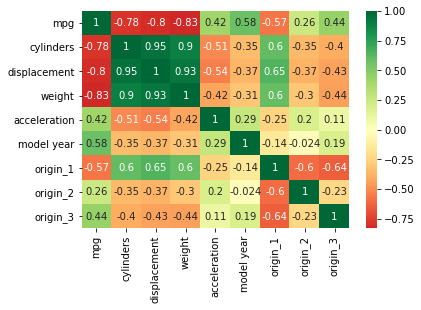

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_auto_dummies.corr())
plt.figure(figsize=(6,4))  
p=sns.heatmap(df_auto_dummies.corr(), annot=True,cmap ='RdYlGn', center = 0)  

Based on the above correlation matrix, it seems that mpg is highly negatively correlated with cylinders,displacement,weight.  

Text(0.5, 0, 'weight')

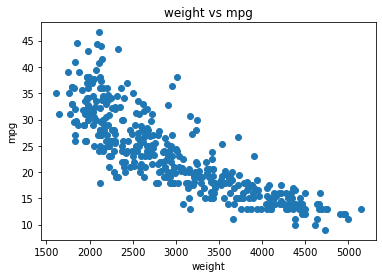

In [113]:
# Creating a scatter plot for weight Vs mpg
plt.scatter(df_auto_dummies['weight'],df_auto_dummies['mpg'])
plt.title('weight vs mpg')
plt.ylabel('mpg')
plt.xlabel('weight')

The above plot indicates that weight and mpg are negativelty correlated. It is evident from graph as well that as the weight increases, mpg decreases.

In [114]:
import sklearn
from sklearn.model_selection import train_test_split
target = df_auto_dummies.mpg
features=df_auto_dummies.drop('mpg',axis=1)
features.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,1,0,0
1,8,350.0,165,3693,11.5,70,1,0,0
2,8,318.0,150,3436,11.0,70,1,0,0
3,8,304.0,150,3433,12.0,70,1,0,0
4,8,302.0,140,3449,10.5,70,1,0,0


In [115]:
#splitting
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)
#printing shapes of testing and training sets :
print("shape of original dataset :", df_auto_dummies.shape)
print("shape of input - training set", features_train.shape)
print("shape of output - training set", target_train.shape)
print("shape of input - testing set", features_test.shape)
print("shape of output - testing set", target_test.shape)

shape of original dataset : (398, 10)
shape of input - training set (318, 9)
shape of output - training set (318,)
shape of input - testing set (80, 9)
shape of output - testing set (80,)


In [116]:
#Train the model

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(features_train,target_train)
pd.DataFrame(regr.coef_, features.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.299839
displacement,0.023265
horsepower,-0.016855
weight,-0.006983
acceleration,0.109632
model year,0.829510
origin_1,-1.833390
origin_2,0.995535
origin_3,0.837855


In [117]:
# Evaluate test model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

target_pred = regr.predict(features_test)
print("Mean absolute error: {}".format(mean_absolute_error(target_test,target_pred)))
print("Mean squared error: {}".format(mean_squared_error(target_test,target_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(target_test,target_pred))))
R2 = r2_score(target_test,target_pred)
print('R Squared: {}'.format(R2))

Mean absolute error: 2.104034427834466
Mean squared error: 7.61664745893494
Root Mean squared error: 2.759827432818027
R Squared: 0.8648119349734977


In [118]:
# Evaluate train model
yy_pred = regr.predict(features_train)
print("Mean absolute error: {}".format(mean_absolute_error(target_train,yy_pred)))
print("Mean squared error: {}".format(mean_squared_error(target_train,yy_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(target_train,yy_pred))))
R2 = r2_score(target_train,yy_pred)
print('R Squared: {}'.format(R2))

Mean absolute error: 2.653811605497395
Mean squared error: 11.525142528566255
Root Mean squared error: 3.394870031174427
R Squared: 0.8143146755966507


 Based on the R2 and RMSE values, we can conclude that test model is more accurate

In [119]:
# Lasso Regression
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=1)
reg_lasso.fit(features_train, target_train)

Lasso(alpha=1)

In [120]:
# Evaluate test model
target_pred = reg_lasso.predict(features_test)
print("Mean absolute error: {}".format(mean_absolute_error(target_test,target_pred)))
print("Mean squared error: {}".format(mean_squared_error(target_test,target_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(target_test,target_pred))))
R2 = r2_score(target_test,target_pred)
print('R Squared: {}'.format(R2))

Mean absolute error: 2.1849446890500874
Mean squared error: 8.514565402156832
Root Mean squared error: 2.9179728240949796
R Squared: 0.8488747670854991


In [121]:
# Evaluate train model
from sklearn.model_selection import cross_val_score
yy_pred = reg_lasso.predict(features_train)
print("Mean absolute error: {}".format(mean_absolute_error(target_train,yy_pred)))
print("Mean squared error: {}".format(mean_squared_error(target_train,yy_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(target_train,yy_pred))))
R2 = r2_score(target_train,yy_pred)
print('R Squared: {}'.format(R2))


Mean absolute error: 2.741297021742521
Mean squared error: 12.543334673587083
Root Mean squared error: 3.541657051944341
R Squared: 0.797910250377221


Based on the R2 and RMSE values, we can conclude that test model is more accurate 

Based on the RMSE values, it seems that the linear regression model is more accurate